### Exploratory Data Analysis 



The HOUSES dataset contains a collection of recent real estate listings in San Luis Obispo county and around it. The dataset is as a CSV file. The dataset contains the following fields:

1. MLS: Multiple listing service number for the house (unique ID).
2. Location: city/town where the house is located. Most locations are in San Luis Obispo county and northern Santa Barbara county (Santa Maria-Orcutt, Lompoc, Guadelupe, Los Alamos), but there some out of area locations as well.
4. Price: the most recent listing price of the house (in dollars).
5. Bedrooms: number of bedrooms.
6. Bathrooms: number of bathrooms.
7. Size: size of the house in square feet.
8. Price/SQ.ft: price of the house per square foot.
9. Status: type of sale. Thee types are represented in the dataset: Short Sale, Foreclosure and Regular.

Lets import the required libraries that we will be using later. 

In [1]:
from numpy import * # everything 
import pandas as pd 

Let's load the dataset into a pandas dataframe and have a look at the headers.

In [2]:
df = pd.read_csv('data.csv', sep=',', error_bad_lines=False) # read fie as a dataframe

Lets take a look at the first 2 rows of the dataframe.

In [3]:
df.head(2)

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000,4,3,2818,141.59,Short Sale


Examine the provided columns, does the pandas infered datatype of each column make sense? Include your code and/or comments below. 

In [4]:
df.dtypes

# The inferred columns make sense, provided that pandas makes no large distinction between an object and a string

MLS              int64
Location        object
Price            int64
Bedrooms         int64
Bathrooms        int64
Size             int64
Price/SQ.Ft    float64
Status          object
dtype: object

Next, lets look at a specific column or feature in the dataframe. 
Based on the provided dataset, what are the distinct number of bedrooms and bathrooms?  Hint : Use the unique function https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html

In [5]:
unique_bedrooms = unique(df.Bedrooms)
print unique_bedrooms

unique_bathrooms = unique(df.Bathrooms)
print unique_bathrooms

[ 0  1  2  3  4  5  6  7 10]
[ 1  2  3  4  5  6  7 11]


What if we want to drop a column from the dataframe, like the 'Location' column. Hint: Use the drop function https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [6]:
df.drop('Location', axis = 1)

,MLS,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,795000,3,3,2371,335.30,Short Sale
1,134364,399000,4,3,2818,141.59,Short Sale
2,135141,545000,4,3,3032,179.75,Short Sale
3,135712,909000,4,4,3540,256.78,Short Sale
4,136282,109900,3,1,1249,87.99,Short Sale
5,136431,324900,3,3,1800,180.50,Short Sale
6,137036,192900,4,2,1603,120.34,Short Sale
7,137090,215000,3,2,1450,148.28,Short Sale
8,137159,999000,4,3,3360,297.32,Short Sale
9,137570,319000,3,2,1323,241.12,Short Sale


Let's rename the first column. 

Hint: A Google search for 'python pandas dataframe rename' points you at this documentation 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

In [7]:
print ("Before rename", df.columns)

df.rename(columns={"MLS": "ID"}, inplace = True)

print ("After rename", df.columns)

('Before rename', Index([u'MLS', u'Location', u'Price', u'Bedrooms', u'Bathrooms', u'Size',
       u'Price/SQ.Ft', u'Status'],
      dtype='object'))
('After rename', Index([u'ID', u'Location', u'Price', u'Bedrooms', u'Bathrooms', u'Size',
       u'Price/SQ.Ft', u'Status'],
      dtype='object'))


What is the max, min, mean/avg, and standard deviation of the column 'Bedrooms'?

In [8]:
max = df.Bedrooms.max()
min = df.Bedrooms.min()
dev = df.Bedrooms.std()

print "Max : " + str(max) + "\nMin : " + str(min) + "\nStandard Deviation : " + str(dev)

Max : 10
Min : 0
Standard Deviation : 0.8557678151609314


Plot the distribution of 'Price/SQ.Ft' using matplotlib

In [9]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# plot histogram 
n, bins, patches = plt.hist(df['Price/SQ.Ft'], 10, facecolor='green')
plt.show()

<Figure size 640x480 with 1 Axes>

One of the best ways to inspect data is visualize it. One way to do this is by using a scatter plot. A scatter plot of the data puts one feature along the x-axis and another along the y-axis, and draws a dot for each data point. 

Since its difficult to visualize more than 2 or 3 features, one possibility is to use a pair plot that looks at all possible pairs of features. The pair plot shows the interaction of each pair of features inorder to visualize any correlation between features. 

(781, 8)


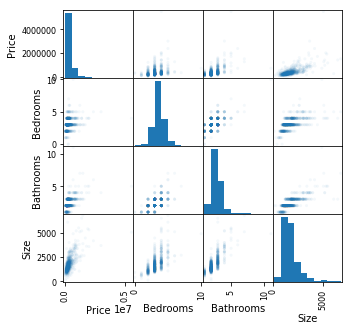

In [10]:
# import the scatter_matrix functionality
import random as rand
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

print (df.shape)
x = df.iloc[:,[1,2,3,4,5]] # extract only a subset of columns from dataframe (using index)
y = x.dropna(thresh=5) # drop any rows that have 5 or more fields as NAN  
a = pd.plotting.scatter_matrix(x, alpha=0.05, figsize=(5,5), diagonal='hist')
plt.show()

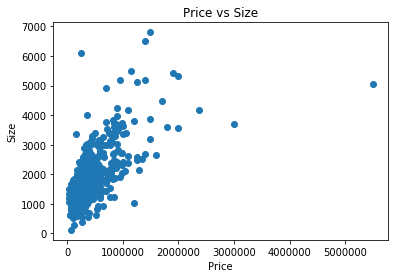

In [11]:
#Lets plot the Price vs Size of the homes

fig=plt.figure()
plt.scatter(df.Price, df.Size)
axis = fig.gca() #get current axis
axis.set_title('Price vs Size')
axis.set_xlabel('Price')
axis.set_ylabel('Size')
fig.canvas.draw()

What does the visualizations and the statistics we observed tell you so far. Is there any other interesting stats or visualizations you think might be helpful. Include your comments and code below

In [12]:
# So far, the visualizations tell me that the data gathered skewed towards "family homes", rather than luxury homes like the outlier in the scatterplot above.
# It has revealed some interesting properties, like the BATHROOM for sale in Pismo Beach. California real estate is wild. 

## Categorical Encoding
If we have categorical or continuous variables and we would like to encode them into discrete integer files (like 0, 1, 2, ...) we can use several tricks in pandas to do this.

In [13]:
# Approach 1 - Pandas makes it easy for us to directly replace the text values with their numeric equivalent by using replace .

newValues = {"Status": {"Foreclosure": 1, "Short Sale": 2, "Regular" : 3}}
df2 = df.replace(newValues, inplace=False )
df2.head()

,ID,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000,3,3,2371,335.30,2
1,134364,Paso Robles,399000,4,3,2818,141.59,2
2,135141,Paso Robles,545000,4,3,3032,179.75,2
3,135712,Morro Bay,909000,4,4,3540,256.78,2
4,136282,Santa Maria-Orcutt,109900,3,1,1249,87.99,2


In [14]:
# Approach 2 - Another approach to encoding categorical values is to use a technique called label encoding.
# Label encoding is simply converting each value in a column to a number.

# One trick you can use in pandas is to convert a column to a category, then use those category 
# values for your label encoding. 

df["Status"] = df["Status"].astype('category')
df.dtypes

# Then you can assign the encoded variable to a new column using the cat.codes accessor.
df["Status_cat"] = df["Status"].cat.codes
df.head()

,ID,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status,Status_cat
0,132842,Arroyo Grande,795000,3,3,2371,335.30,Short Sale,2
1,134364,Paso Robles,399000,4,3,2818,141.59,Short Sale,2
2,135141,Paso Robles,545000,4,3,3032,179.75,Short Sale,2
3,135712,Morro Bay,909000,4,4,3540,256.78,Short Sale,2
4,136282,Santa Maria-Orcutt,109900,3,1,1249,87.99,Short Sale,2


In [15]:
"""Approach 3 - Label encoding has the advantage that it is straightforward but it has the 
   disadvantage that the numeric values can be “misinterpreted” by the algorithms. For example, 
   the value of 1 is obviously less than the value of 3 but does that really correspond to the data set in real life?
   For example, is "Foreclosure" =1 closer to "Short Sale" =2 compared to "Regular" =3?

   A common alternative approach is called one hot encoding. The basic strategy is to convert each category value 
   into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting 
   a value improperly but does have the downside of adding more columns to the data set.

   Pandas supports this feature using get_dummies. This function is named this way because it creates 
   dummy/indicator variables (aka 1 or 0)."""

pd.get_dummies(df, columns=["Status"], prefix=["new"]).head()

# basically, it creates a 3 new columns (one for each unique value in the column.) with the prefix "new_"

,ID,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status_cat,new_Foreclosure,new_Regular,new_Short Sale
0,132842,Arroyo Grande,795000,3,3,2371,335.30,2,0,0,1
1,134364,Paso Robles,399000,4,3,2818,141.59,2,0,0,1
2,135141,Paso Robles,545000,4,3,3032,179.75,2,0,0,1
3,135712,Morro Bay,909000,4,4,3540,256.78,2,0,0,1
4,136282,Santa Maria-Orcutt,109900,3,1,1249,87.99,2,0,0,1


# Submission Instructions






Upload the .ipyn notbook to iLearn.

Have the TA check your lab to obtain credit.